<a href="https://colab.research.google.com/github/natrask/ENM1050/blob/main/Code%20examples/Lecture09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Classes and linear algebra**#

#CONTRIBUTORS#

This in-class exercise is to be done in pairs. Add the names of the two students in this text block.


# Scope in functions

So far, we haven't really discussed scope. As we take the final step toward using classes in Python, our programs will begin to be complicated enough that bugs due to scope errors will begin to appear. The rules of scope are relatively simple. When you go one step out of scope (e.g. from inside a function to outside a function) any variables that you declared inside are no longer visible. This is nice, otherwise you would be dealing with a huge headache of *variable name clashing*, where you wouldn't be able to use two variables with the same name in different parts of your code.

In the code below, I've commented out the functions that wouldn't work. Try uncommenting them so you see what error messages get thrown up when you make a scoping bug.

In [2]:
# Global Scope
x = 10

def outer_function():
    # Enclosing Scope
    y = 20

    def inner_function():
        # Local Scope
        z = 30
        print("Inside inner_function:")
        print("x (global):", x)
        print("y (enclosing):", y)
        print("z (local):", z)

    inner_function()
    print("Inside outer_function:")
    print("x (global):", x)
    print("y (enclosing):", y)
    # z is not accessible here, it is local to inner_function
    # print("z (local):", z)  # This would raise a NameError

outer_function()
print("In global scope:")
print("x (global):", x)
# y and z are not accessible here, they are local to inner_function and outer_function
# print("y (enclosing):", y)
# print("z (local):", z)

Inside inner_function:
x (global): 10
y (enclosing): 20
z (local): 30
Inside outer_function:
x (global): 10
y (enclosing): 20
In global scope:
x (global): 10


We'll just do a little experiment here. Check what happens when you pass a globally scoped variable into a function. Anything you do to the variable inside the function does not persist outside the function, whether you define a new variable with the same name or you take a variable scoped outside into the function.

In [7]:
# Global Scope
x = 10

def outer_function_1():
    # Enclosing Scope
    x = 3
    y = 20
def outer_function_2(z):
    # Enclosing Scope
    z = 3
    y = 20

# Here are three little experiments:

print(x) # the original value
outer_function_1()
print(x) # the value is unchanged, because a second x was defined inside outer_function_1
outer_function_2(x)
print(x) # the value is unchanged

10
10
10


# Introduction to classes

The final ingredient to learning python is classes. At the end of today, you will know 90% of the basic syntax, and we will pivot the rest of the class toward doing cool science instead of learning the basics.

The syntax for classes comes in a few flavors.

1. Classes with no instances.
2. Classes with instances.
3. Classes with inheritance.

We gave examples on slides in class. Please run the following to get some specific examples of each.

Example 1. Just a container for objects. You can use these to group collections of variables and functions.

In [13]:
class GenericDog:
    what_do_they_go = 'Dogs go woof'
    def whatKindofAnimal():
        return f"I am a dog!"

print(GenericDog.whatKindofAnimal())
print(GenericDog.what_do_they_go)

I am a dog!
Dogs go woof


Example 2. Now we introduce how to use init and self to define how to specialize across multiple instances of one Dog.

In [21]:
class Dog:
    def __init__(self, name, age, breed):
        self.name = name
        self.age = age
        self.breed = breed

    def whatKindofAnimal(self):
        return f"I am a dog!"

    def bark(self):
        return f"{self.name} says woof!"

    def get_info(self):
        return f"Name: {self.name}, Age: {self.age}, Breed: {self.breed}"

# Example usage. Instantiate two different dog objects
my_dog1 = Dog("Buddy", 3, "Golden Retriever")
my_dog2 = Dog("Fido", 5, "Cocker Spaniel")

#Look at how it specializes across the different instances of Dog
print(my_dog1.whatKindofAnimal())
print(my_dog1.bark())
print(my_dog1.get_info())

print(my_dog1.whatKindofAnimal())
print(my_dog2.bark())
print(my_dog2.get_info())

I am a dog!
Buddy says woof!
Name: Buddy, Age: 3, Breed: Golden Retriever
I am a dog!
Fido says woof!
Name: Fido, Age: 5, Breed: Cocker Spaniel


Example 3. We can generalize classes to describe taxonomies (i.e. dog with a job is an example of a dog is an example of an animal and so on). This allows us to design classes generically at a broad level and then add in functionality where it makes sense. Note that we can **overload** a function from a previous level - in this setting a workingdog woofs differently than a plain old dog.

In [22]:
class WorkingDog(Dog):
    def __init__(self, name, age, breed, job):
        super().__init__(name, age, breed)
        self.job = job

    def bark(self):
        return f"{self.name} says woof, I'm a {self.job}!"

    def do_job(self):
        return f"{self.name} is doing their job: {self.job}"

# Example usage:
working_dog = WorkingDog("Max", 4, "German Shepherd", "Police Dog")
print(working_dog.bark())
print(working_dog.get_info())
print(working_dog.do_job())

Max says woof, I'm Police Dog!
Name: Max, Age: 4, Breed: German Shepherd
Max is doing their job: Police Dog



# Further examples and exercises

Here are some further examples you can use to practice.


**Example 1: Basic Class with Attributes and Methods**

This example demonstrates a simple class with attributes and a method.



In [ ]:
class Car:
    def __init__(self, make, model, year):
        self.make = make
        self.model = model
        self.year = year

    def get_description(self):
        return f"{self.year} {self.make} {self.model}"

# Example usage:
my_car = Car("Toyota", "Corolla", 2020)
print(my_car.get_description())

**Example 2: Class Inheritance.**
Here are two examples of class inheritance. One generates an abstract shape function, illustrating how we can design a parent class as a generic template for child classes to implement.

In [38]:
class Shape:
    def __init__(self, color):
        self.color = color

    def area(self):
        pass  # This method will be overridden in subclasses. Returning pass signifies that this is meant to be overloaded

class Rectangle(Shape):
    def __init__(self, color, width, height):
        super().__init__(color)
        self.width = width
        self.height = height

    def area(self):
        return self.width * self.height

# Example usage:
rect = Rectangle("blue", 5, 10)
print(f"A {rect.color} rectangle with area: {rect.area()}")

A blue rectangle with area: 50


Look what happens when you attempt to call the area function - this is the intended usage of the 'pass' function.

In [37]:
circ = Shape('red')
print(circ.area())

None


This example shows a BankAccount class with a class variable to keep track of the total number of accounts created.

In [34]:
class BankAccount:
    total_accounts = 0  # Class variable

    def __init__(self, owner, balance=0):
        self.owner = owner
        self.balance = balance
        BankAccount.total_accounts += 1

    def deposit(self, amount):
        self.balance += amount

    def withdraw(self, amount):
        if amount <= self.balance:
            self.balance -= amount
        else:
            print("Insufficient funds")

    def get_balance(self):
        return self.balance

# Example usage:
account1 = BankAccount("Alice", 1000)
account2 = BankAccount("Bob", 500)

account1.deposit(200)
account2.withdraw(100)

print(f"Total bank accounts created: {BankAccount.total_accounts}")
print(f"{account1.owner}'s balance: {account1.get_balance()}")
print(f"{account2.owner}'s balance: {account2.get_balance()}")

Total bank accounts created: 2
Alice's balance: 1200
Bob's balance: 400


**Your Turn:** We are going to write a program to collect students grades and compute their average. Write a class called Gradebook_entry which takes a students name and a list of grades. The class should also maintain a function called **calculate_grade**.

In [39]:
# You write code here

This is an example of an **interface**. Somebody has described to you how they would like to interact with your class, and the implementation can be hidden from them. Make sure your code can ingest the following inputs:

In [ ]:
name1 = "Bob Blimpy"
grades1 = [100,98,23,67]
name2 = "Carly Cockledoodle"
grades2 = [87,85,89,91]
name3 = "Dongil Dude"
grades3 = [54,99,97,73]

Write a while loop to accept an arbitrary number of student entries and print them out.

In [33]:
while(True):
  add_another = input('Add another entry? (Y/N) ')
  if add_another == 'N' or add_another == 'n':
    break
  if add_another == 'Y' or add_another == 'y':
    somecode = 0 # write code here
  else:
    print("Invalid response. Please try again. \n")

Add another entry? (Y/N) N


Now we would like to modify the grading scheme, so that rather than using the mean we use the mode to calculate the students grade. Write a new class called modified_Gradebook_entry that inherits from from the Gradebook_entry class and overloads the **calculate_grade** class to use the mode instead.

# Linear solvers using numpy

In class we provided a (very brief) explanation about how to use matrices to encode linear systems of equations. We will discuss linear algebra more later in the course, but for this week we will use it as a "black box" to solve systems.

Consider the example shown in class:
\begin{align*}
    3\, x_1 + 2\, x_2 + 7\, x_3 = 1\\
    9\, x_1 + 2\, x_2 + 8\, x_3 = 10\\
    2\, x_1 + 17\, x_2 + 9\, x_3 = 6    
\end{align*}

This maps into the following matrices:
\begin{equation*}
\mathbf{A} =
\begin{bmatrix}
3 & 2 & 7 \\
9 & 2 & 8 \\
2 & 17 & 9
\end{bmatrix},
\quad \mathbf{x} =
\begin{bmatrix}
x_1 \\
x_2 \\
x_3
\end{bmatrix},
\quad \mathbf{b} =
\begin{bmatrix}
1 \\
10 \\
6
\end{bmatrix}
\end{equation*}

Write these as a 3x3, 3x1, and 3x1 numpy array called A_mat, x_vec, and b_vec

In [50]:
import numpy as np
#re-write code here
A_mat = np.array([[0,0,0],[0,0,0],[0,0,0]])
b_vec = np.array([0,0,0])

The following code will provide a solution to this system of equations:

In [55]:
import numpy as np

# Solve the system of equations
solution = np.linalg.solve(A_mat, b_vec)[0]

# Print the solution
print("Solution:")
print(solution)

Solution:
[0. 0. 0.]


<ipython-input-55-cca3b2a1d0ce>:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  solution = np.linalg.lstsq(A_mat, b_vec)[0]


Verify that the solution satisfies the equations by plugging the solution back into the governing equations.

In linear algebra, this is equivalent to checking that
$$ \mathbf{A}\,x_{sol} - \mathbf{b} = 0$$

In [57]:
print(A_mat @ solution - b_vec)

[0. 0. 0.]


# Today's primary exercise.

Today we are going to build up a class that will allow us to solve equations on arbitrary circuits.

In class today we introduced graphs as a mathematical object. Below you can see an implementation I've put together which may be used to construct a graph.

In [40]:
class DirectedGraph:
    def __init__(self, num_vertices):
        self.num_vertices = num_vertices
        self.adjacency_list = [[] for _ in range(num_vertices)]

    def add_edge(self, src, dest):
        if src < self.num_vertices and dest < self.num_vertices:
            self.adjacency_list[src].append(dest)
        else:
            print("Error: Vertex out of bounds")

    def remove_edge(self, src, dest):
        if src < self.num_vertices and dest < self.num_vertices:
            if dest in self.adjacency_list[src]:
                self.adjacency_list[src].remove(dest)
            else:
                print("Error: Edge does not exist")
        else:
            print("Error: Vertex out of bounds")

    def has_edge(self, src, dest):
        if src < self.num_vertices and dest < self.num_vertices:
            return dest in self.adjacency_list[src]
        else:
            print("Error: Vertex out of bounds")
            return False

    def get_adjacent_vertices(self, vertex):
        if vertex < self.num_vertices:
            return self.adjacency_list[vertex]
        else:
            print("Error: Vertex out of bounds")
            return []

    def __str__(self): # This is a handy function to overload which let's you define what happens when you execute print(this_object)
        result = ""
        for i in range(self.num_vertices):
            result += f"{i}: {self.adjacency_list[i]}\n"
        return result

**Example of how to use this class.** To build up a graph, you must first specify the number of nodes (you can get a clue about how you're meant to interact with the object by reading its constructor). You then can build up the graph an edge at a time.

In [ ]:
# Build up a graph consisting of 5 edges
graph = DirectedGraph(5)
graph.add_edge(0, 1)
graph.add_edge(0, 2)
graph.add_edge(1, 2)
graph.add_edge(2, 3)
graph.add_edge(3, 4)


# Show ways to interact with the graph - printing it out, checking the existence of an edge, looping over neighbors of nodes, and deleting edges
print("Graph adjacency list:")
print(graph)
print("Does an edge exist from 0 to 2?", graph.has_edge(0, 2))
print("Adjacent vertices to vertex 2:", graph.get_adjacent_vertices(2))
graph.remove_edge(2, 3)
print("Graph adjacency list after removing edge from 2 to 3:")
print(graph)

**Your turn.** Use this class to build up the circuit below. You should have 3 nodes corresponding to V1,V2, and V3, and 5 edges corresponding to R1,...,R5.

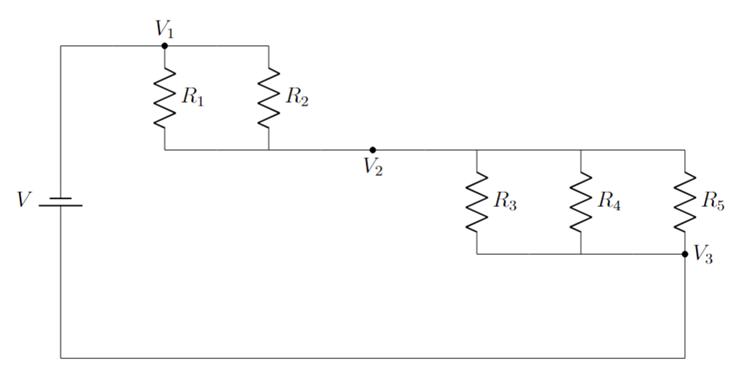

Write a new class called resistor_network which inherits from the Directed graph class, but allows you to additionally store a resistance on each node. You should also include a way to determine whether a voltage value will be imposed (in the example above, we fixed $V_1=V$ and $V_3 = 0$ to drive the circuit with a given voltage drop).

Use this matrix to build and solve the equations presented in class, copied below for convenience.

**Note that this is a hard task. Do your best to put this together, and I will demo this in class on Wednesday.**

\begin{equation*}
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 &  0 & 0 & 0\\
0 & 0 & 0 & 1 & 1 &  -1 & -1 & -1\\
0 & 0 & 1 & 0 & 0 &  0 & 0 & 0\\
-\frac{1}{R_1} & \frac{1}{R_1} & 0 & 1 & 0 &  0 & 0 & 0\\
-\frac{1}{R_2} & \frac{1}{R_2} & 0 & 1 & 0 &  0 & 0 & 0\\
0 & -\frac{1}{R_3} & \frac{1}{R_3} & 0 & 0 &  1 & 0 & 0\\
0 & -\frac{1}{R_4} & \frac{1}{R_4} & 0 & 0 &  1 & 0 & 0\\
0 & -\frac{1}{R_5} & \frac{1}{R_5} & 0 & 0 &  1 & 0 & 0\\
\end{bmatrix}
\begin{bmatrix}
V_1 \\
V_2 \\
V_3 \\
I_1 \\
I_2 \\
I_3 \\
I_4 \\
I_5
\end{bmatrix}
=
\begin{bmatrix}
V \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
\end{bmatrix}
\end{equation*}

#**Turning in assignments on Canvas**#

In order to submit your assignment as a pair, you need to create a group on Canvas. This will enable you to both receive the same grade for one submission.
1. On Canvas, navigate to `People > Groups > In-Class 09`.
1. Find an empty group and add the names of both members of the pair.


Submit your work as both an ipynb and a pdf to Canvas.
1. Click on `File > Download .ipynb` to download the ipynb file. Do NOT clear your outputs before doing this step.
1. Click on `File > Print` to print the notebook to a pdf. This is a backup for the graders in case we are not able to access or run your ipynb during grading.
1. On Canvas, navigate to the relevant assignment and attach both the ipynb and pdf files to your submission.
1. The student who did not submit should make sure that the group was created successfully by checking that they can also access the files on their Canvas page.